### neuralprophet_Korea, South confirmed cases demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from neuralprophet import NeuralProphet

In [2]:
DEATHS_PATH = r"C:\Users\offco\Documents\Dev_Projects\JHUCovidDatasetAnP\modified\deaths"
data = pd.read_csv(DEATHS_PATH + "/deaths_korea, south.csv")

In [3]:
data.head()

,Date,"Korea, South"
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [4]:
data.rename(columns={'Date': 'ds', 'Korea, South': 'y'}, inplace=True)
data['ds'] = data['ds'].apply(lambda x: pd.to_datetime(x))
data.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### Recent 2.5% Prediction

In [5]:
def train_test_split(df, test_size):
    
    test_size = floor(len(df)*test_size)
    train_data = df[:-test_size]
    test_data = df[-test_size:]
    
    return [train_data, test_data]

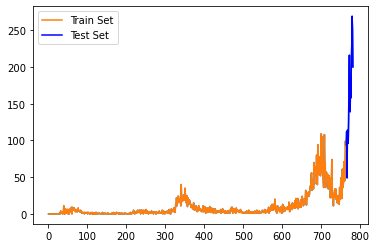

In [6]:
train_data, test_data = train_test_split(data, 0.025)

plt.plot(data['y'].diff())
plt.plot(train_data['y'].diff(), label='Train Set')
plt.plot(test_data['y'].diff(), label='Test Set', color='Blue')
plt.legend()

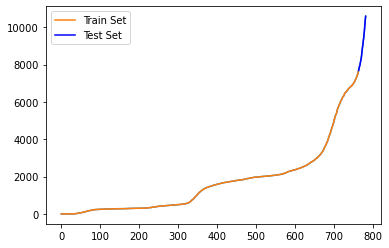

In [7]:
plt.plot(data['y'])
plt.plot(train_data['y'], label='Train Set')
plt.plot(test_data['y'], label='Test Set', color='Blue')
plt.legend()

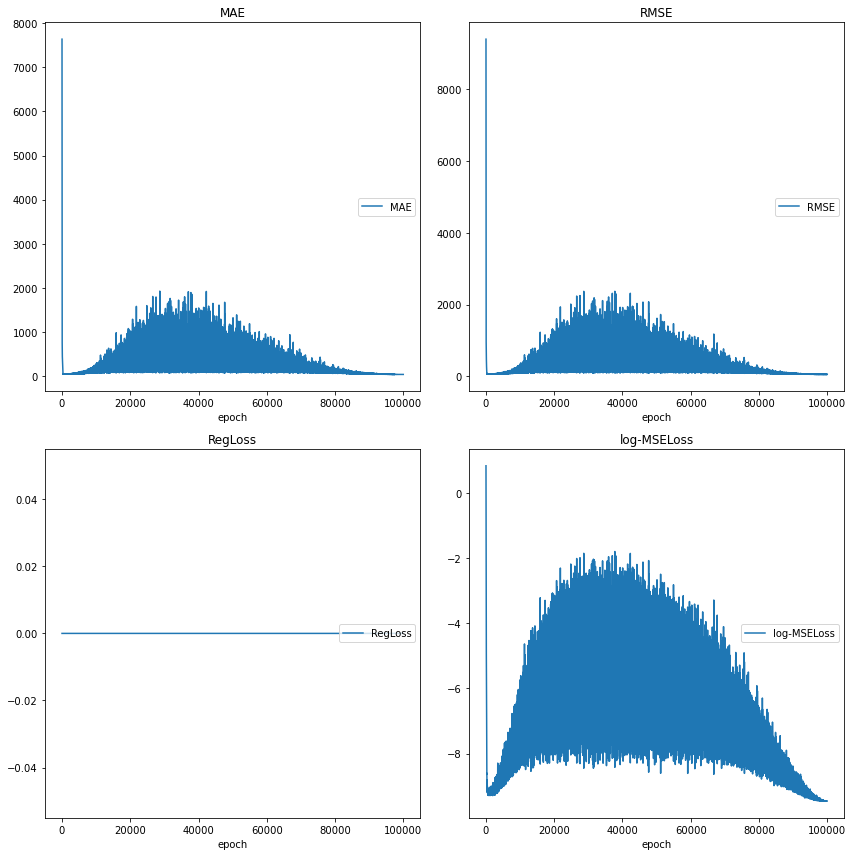

MAE
	MAE              	 (min:   38.018, max: 7640.004, cur:   38.019)
RMSE
	RMSE             	 (min:   53.303, max: 9399.596, cur:   54.587)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	log-MSELoss      	 (min:   -9.452, max:    0.828, cur:   -9.452)


,MSELoss,MAE,RMSE,RegLoss
0,2.288649,7640.003643,9399.595686,0.0
1,2.104594,7326.927694,9018.073403,0.0
2,1.933850,7036.441378,8596.312725,0.0
3,1.773514,6753.322512,8264.955753,0.0
4,1.631934,6481.462942,7917.484922,0.0
...,...,...,...,...
99995,0.000079,38.018832,54.694302,0.0
99996,0.000079,38.018803,54.390168,0.0
99997,0.000079,38.018743,54.465882,0.0
99998,0.000079,38.018598,54.052450,0.0


In [8]:
m1 = NeuralProphet(epochs=10**5, loss_func='MSE')
m1.fit(train_data, freq='D', progress='plot-all')

In [9]:
preds = m1.predict(test_data)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


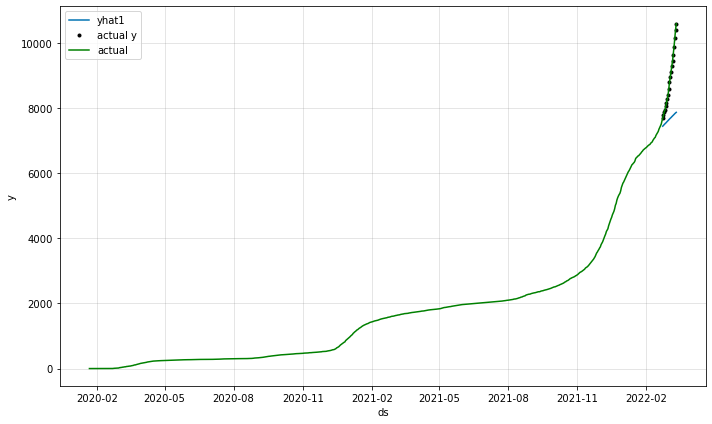

In [10]:
fig1 = m1.plot(preds)
plt.plot(data['ds'], data['y'], 'g-', label='actual')
plt.legend()

### Upcoming 30-Days Prediction

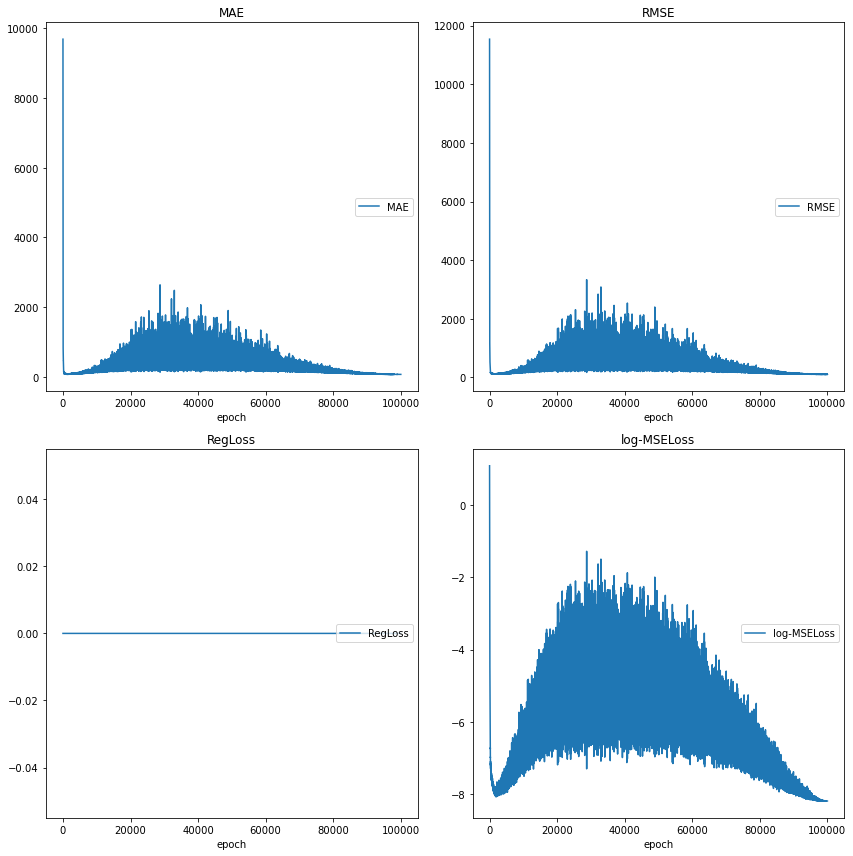

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.872% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


MAE
	MAE              	 (min:   67.977, max: 9692.653, cur:   69.433)
RMSE
	RMSE             	 (min:  102.147, max: 11539.912, cur:  106.156)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	log-MSELoss      	 (min:   -8.187, max:    1.078, cur:   -8.186)


In [11]:
m2 = NeuralProphet(epochs=10**5, loss_func='MSE')
m2.fit(data, freq='D', progress='plot-all')
fut_30 = m2.make_future_dataframe(data, periods=30)
fut_preds = m2.predict(fut_30)

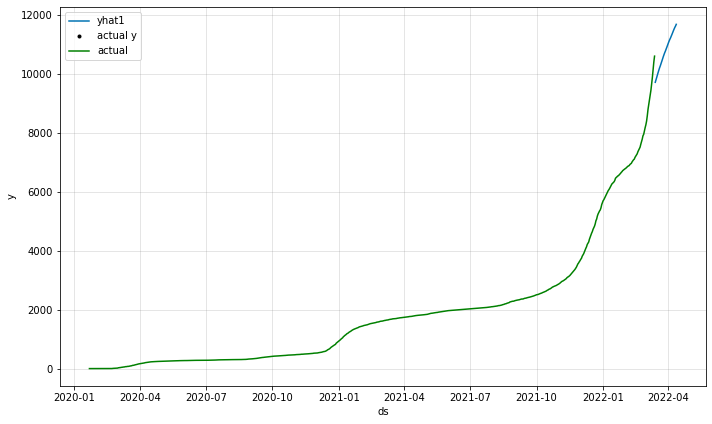

In [12]:
fig2 = m2.plot(fut_preds)
plt.plot(data['ds'], data['y'], 'g-', label='actual')
plt.legend()